In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

wine = pd.read_csv('wine.csv')

wine.rename(columns={
    wine.columns[0]: 'Al',
    wine.columns[1]: 'Mal',
    wine.columns[3]: 'Alc',
    wine.columns[5]: 'TotP',
    wine.columns[6]: 'Flav',
    wine.columns[7]: 'NFlav',
    wine.columns[8]: 'Pro',
    wine.columns[11]: 'OD',
    wine.columns[4]: 'Mg',
    wine.columns[9]: 'Color',
    wine.columns[12]: 'Prl'
}, inplace=True)

wineSelec = wine[['Al', 'Color', 'Flav', 'Mal', 'Alc', 'OD', 'TotP', 'NFlav']]


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


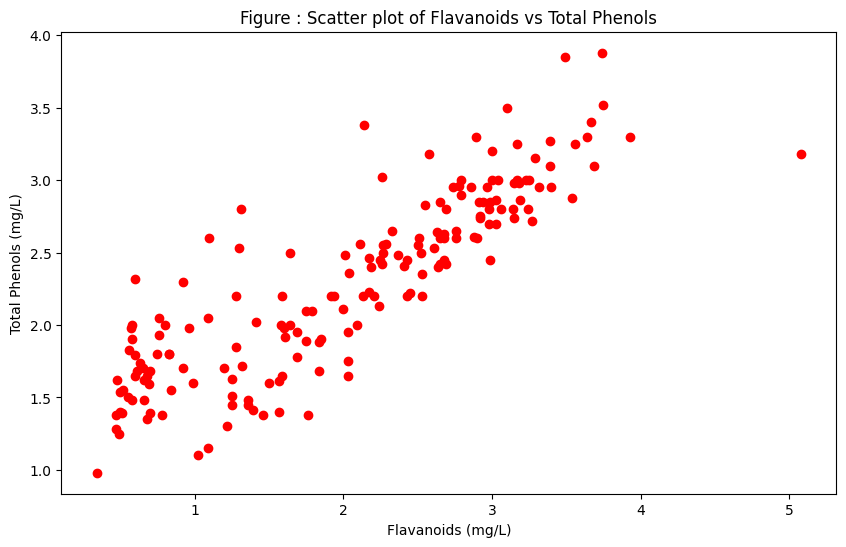

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(wineSelec['Flav'], wineSelec['TotP'], 'ro')
plt.xlabel('Flavanoids (mg/L)')
plt.ylabel('Total Phenols (mg/L)')
plt.title('Figure : Scatter plot of Flavanoids vs Total Phenols')
plt.show()

In [3]:
# Calculate covariance
covariance = round(np.cov(wineSelec['Flav'], wineSelec['TotP'])[0, 1], 2)
print(f"Covariance between Flavanoids and Total Phenols: {covariance}")

# Calculate correlation
correlation = round(np.corrcoef(wineSelec['Flav'], wineSelec['TotP'])[0, 1], 2)
print(f"Correlation between Flavanoids and Total Phenols: {correlation}")

Covariance between Flavanoids and Total Phenols: 0.54
Correlation between Flavanoids and Total Phenols: 0.86


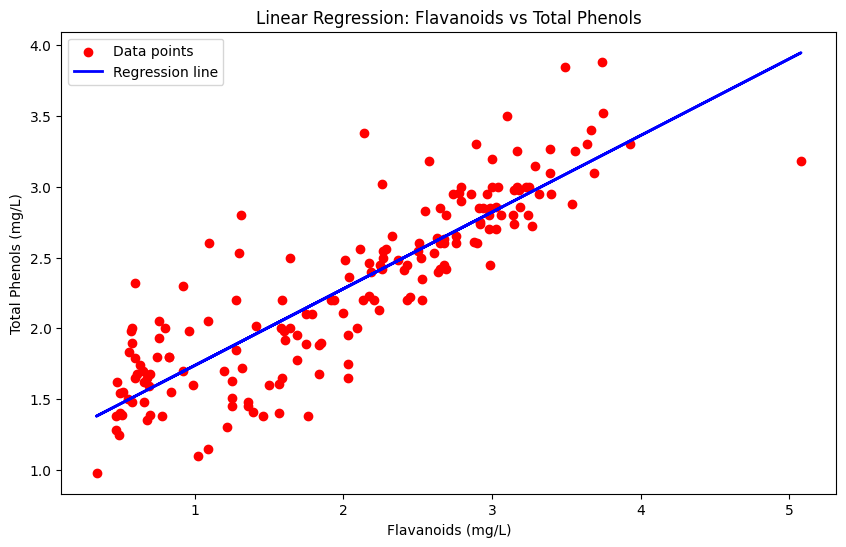

In [4]:
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

# Reshape the data
X = wineSelec['Flav'].values.reshape(-1, 1)
y = wineSelec['TotP'].values

# Fit the model
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(wineSelec['Flav'], wineSelec['TotP'], color='red', label='Data points')
plt.plot(wineSelec['Flav'], y_pred, color='blue', linewidth=2, label='Regression line')
plt.xlabel('Flavanoids (mg/L)')
plt.ylabel('Total Phenols (mg/L)')
plt.title('Linear Regression: Flavanoids vs Total Phenols')
plt.legend()
plt.show()